# clustering d’images représentant des chiffres manuscrits

### Le but de cette activité est de faire un clustering d’images représentant des chiffres manuscrits, en python

Les données utilisées sont présentes dans le répertoire mldata inclus dans le zip de l'exercice.

Ces données ont été obtenues par téléchargement du fichier mnist-original.mat à partir de l'url https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat 

In [529]:
custom_data_home = "."

In [530]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

Les données MNIST sont assez lourdes (70000 images). 
Pour cette activité, nous travaillons avec une fraction du jeu de données : une image sur 50.

In [531]:
X = mnist.data[::50, :]
y = mnist.target[::50]



Chaque observation de ce jeu de données est une image de 28 pixels par 28 pixels, dont l’étiquette y[i] est le chiffre qu’elle représente, et les 784 features le niveau de gris (entre 0 et 255) du pixel correspondant (car 28 x 28 = 784). Pour visualiser une de ces images, par exemple celle d’index 42, on peut utiliser le code suivant :

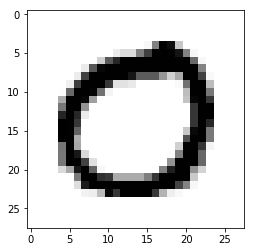

In [532]:
sample_idx = 42
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

### 1) Partitionnement en 10 clusters
Utilisons le modèle k-means de scikit learn, avec 10 clusters

Bien qu'elles soient homogènes (les valeurs de chaque colonnes varient entre 0 et 256) , on scale les données pour leur donner une variance égale à 1. 

In [544]:
from sklearn import preprocessing
X_norm = preprocessing.scale(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [534]:
from sklearn import cluster, metrics

In [535]:
cls = cluster.KMeans(n_clusters = 10)
cls.fit(X_norm)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 2) Visualisation du résultat en 2 dimensions
On réalise une réduction de dimension pour pouvoir visualiser les clusters sur une figure.
L'algorithme T_SNE est adaptée à la réduction de dimension dans le cas d'échantillons avec un nombre de dimensions elevé.

In [536]:
from sklearn.manifold import TSNE

In [537]:
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
print(X_embedded.shape)

(1400, 2)


Dans la figure ci-dessous, chaque image est représentée par un point. La couleur du point est définie par le cluster auquel appartient le point.
Le chiffre mentionné à côté du point correspond au chiffre que représente réellement l'image.

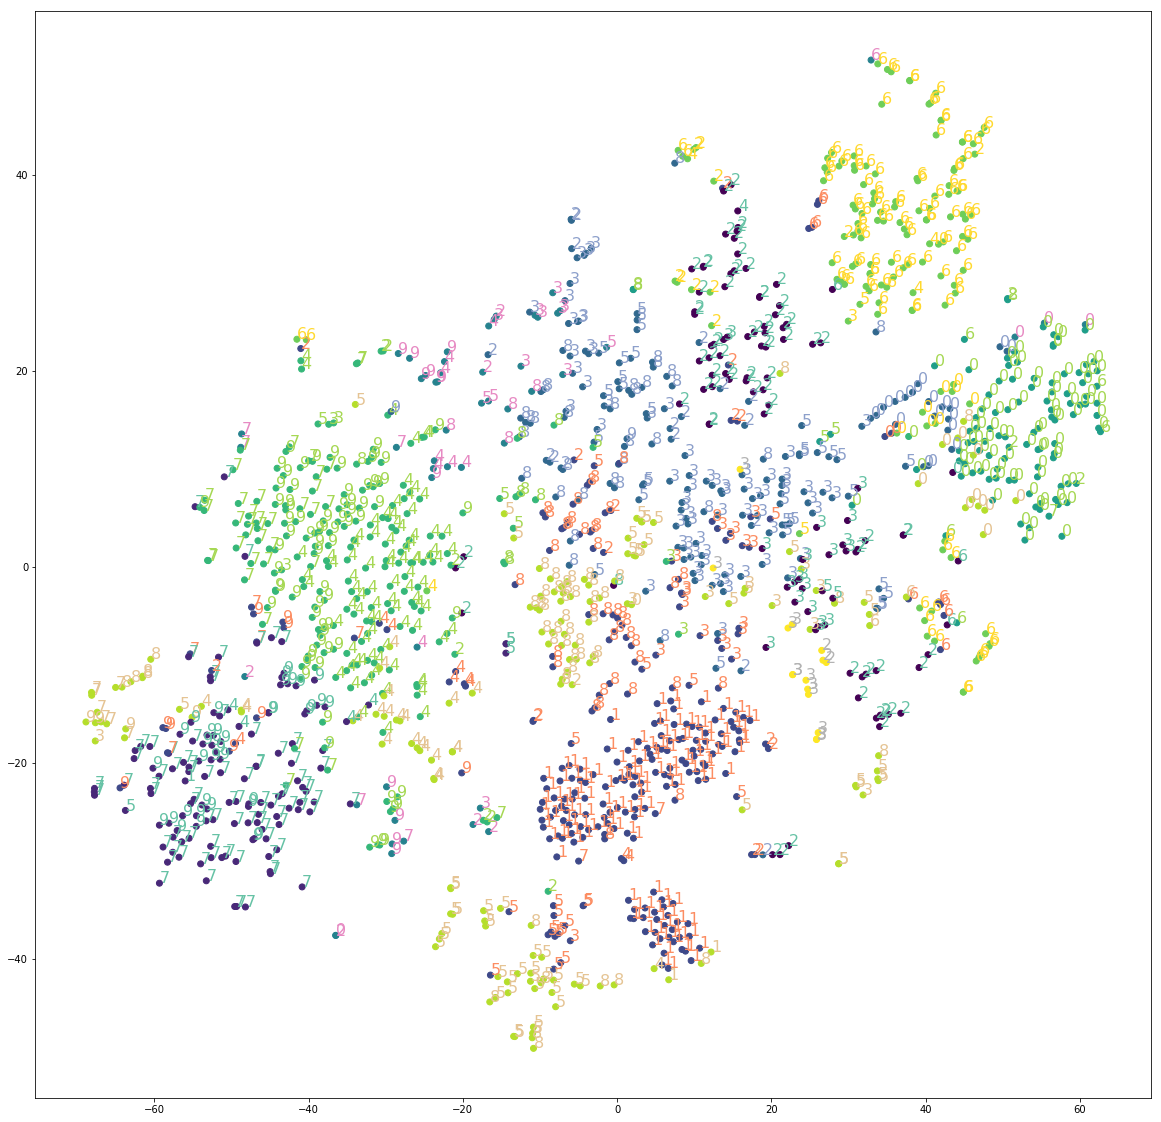

In [538]:
fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=cls.labels_, label=cls.labels_)

#help(plt.text)
indices = np.arange(X_embedded.shape[0])
for i in indices[:5000]:
    plt.text(X_embedded[i,0], X_embedded[i,1],# à vous de définir ces dimensions !
        str('%d' % y[i]),  # le point i est représenté par son chiffre
        color=plt.cm.Set2(cls.labels_[i]/10.) ,
        fontsize =16
        )

### 3) Qualité du partitionnement
La qualité intrinsèque du partitionnement peut être mesurée par l'indicateur de silhouette qui caratérise l'homogénité des clusters et leur distance

In [542]:
#performance intrinsèque
silh = metrics.silhouette_score(X_norm, cls.labels_)
print("La qualité intrinsèque du partionnement mesurée par le score de silhouette est de : " + str(silh))

La qualité intrinsèque du partionnement mesurée par le score de silhouette est de : 0.013541607914240755


La qualité du partitionnement mesuré en tenant compte de l'étiquette prévue peut être mesurée par le Ajusted Rand Score

In [543]:
print("la qualité du partitionnement mesuré en tenant compte de l'étiquette prévue et mesurée par Ajusted Rand Score est de : " + str(metrics.adjusted_rand_score(y, cls.labels_)))

la qualité du partitionnement mesuré en tenant compte de l'étiquette prévue et mesurée par Ajusted Rand Score est de : 0.3433493057050516
